**Лабораторная работа №3**

Студент: Пешков М.Ю. Группа: М8О-109М-23

**Восстановление плотности**

Задание:

1.

*   Взять сгенерировать датасет с помощью sklearn
*   Сгенерировать на плоскости несколько разных классов методом sklearn
*   Восстановить плотность
*   Нарисовать ядерную оценку


2.

*   Подобрав табличный набор данных с числовыми и распределенными признаками, восстановить плотность данных.



**Часть 1**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.neighbors import KernelDensity
from sklearn import datasets
import seaborn
from typing import Mapping, Tuple


In [ ]:
# Генерация данных
np.random.seed(42)

In [ ]:
# Создадим три класса точек
X, y = make_blobs(n_samples=[100, 150, 120], centers=[[1, 1], [5, 5], [8, 2]], cluster_std=1.2)

In [ ]:
# Восстановление плотности с использованием KernelDensity
kde = KernelDensity(bandwidth=0.5, kernel='gaussian')
kde.fit(X)


In [ ]:
# Создание сетки точек для отображения ядерной оценки
x_min, x_max = np.min(X[:, 0]) - 1, np.max(X[:, 0]) + 1
y_min, y_max = np.min(X[:, 1]) - 1, np.max(X[:, 1]) + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
grid_points = np.c_[xx.ravel(), yy.ravel()]

In [ ]:
# Расчет ядерной оценки для каждой точки сетки
log_density = kde.score_samples(grid_points)
density = np.exp(log_density).reshape(xx.shape)

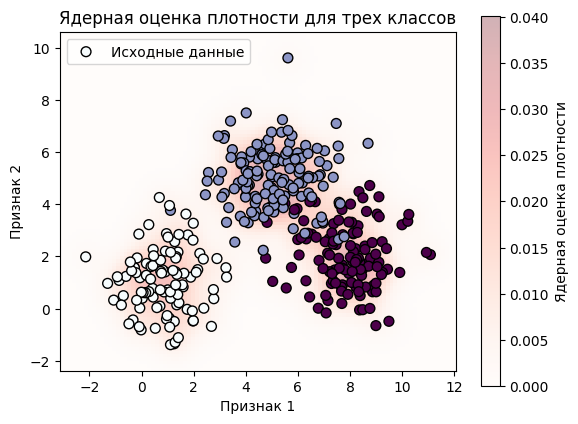

In [ ]:
# Визуализация данных и ядерной оценки
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='BuPu', edgecolor='k', s=50, marker='o', label='Исходные данные')
plt.imshow(density, cmap='Reds', extent=(x_min, x_max, y_min, y_max), origin='lower', alpha=0.3)
plt.colorbar(label='Ядерная оценка плотности')
plt.title('Ядерная оценка плотности для трех классов')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.legend()
plt.show()

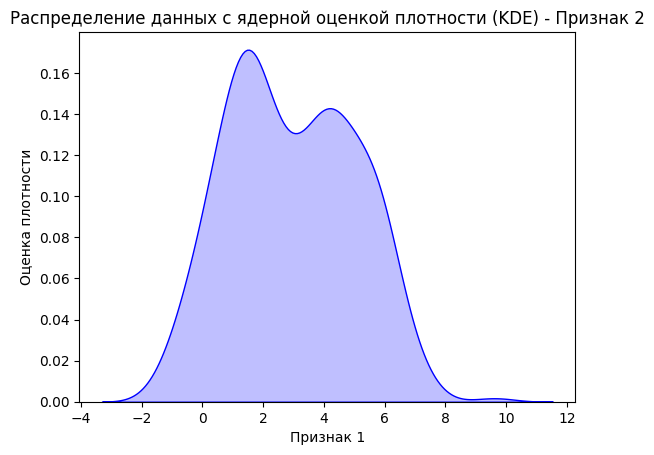

In [ ]:
# Построение распределения данных с ядерной оценкой плотности
seaborn.kdeplot(
            x=X[:, 1],
            fill=True, color='blue', levels=10, label='Ядерная оценка плотности')

plt.title('Распределение данных с ядерной оценкой плотности (KDE) - Признак 2')
plt.xlabel('Признак 1')
plt.ylabel('Оценка плотности')
plt.show()

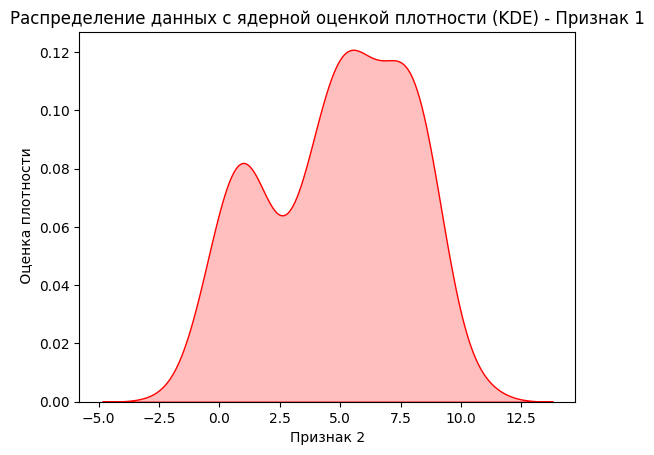

In [ ]:
# Построение распределения данных с ядерной оценкой плотности
seaborn.kdeplot(
            x=X[:, 0],
            fill=True, color='red', levels=10, label='Ядерная оценка плотности')

plt.title('Распределение данных с ядерной оценкой плотности (KDE) - Признак 1')
plt.xlabel('Признак 2')
plt.ylabel('Оценка плотности')
plt.show()

**Часть 2**

In [3]:
# Загружаем набор данных с ирисом
iris = datasets.load_iris()
data = iris.data

In [ ]:
# Выбор признака восстановления плотности (выбран 'sepal length (cm)')
feature_to_visualize = 0
selected_feature = data[:, feature_to_visualize].reshape(-1, 1)

In [ ]:
# Восстановление плотности с помощью Kernel Density Estimation (KDE)
kde = KernelDensity(bandwidth=0.5, kernel='gaussian')
kde.fit(selected_feature)

KernelDensity(bandwidth=0.5)

In [ ]:
# Создание сетки точек для отображения ядерной оценки
x_min, x_max = selected_feature.min() - 1, selected_feature.max() + 1
xx = np.linspace(x_min, x_max, 100).reshape(-1, 1)

In [ ]:
# Расчет ядерной оценки для каждой точки сетки
log_density = kde.score_samples(xx)
density = np.exp(log_density)

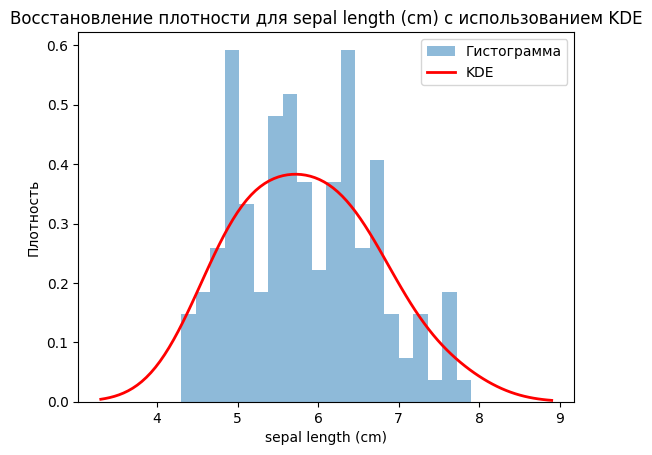

In [ ]:
# Визуализация
plt.hist(selected_feature, bins=20, density=True, alpha=0.5, label='Гистограмма')
plt.plot(xx, density, color='red', lw=2, label='KDE')
plt.title(f'Восстановление плотности для {iris.feature_names[feature_to_visualize]} с использованием KDE')
plt.xlabel(iris.feature_names[feature_to_visualize])
plt.ylabel('Плотность')
plt.legend()
plt.show()


Версия 2:
Восстановление плотности с помощью метода Парзена-Розенблатта

In [4]:
def kernel_laplas(x: np.array) -> np.array:
    return 0.5 * np.e ** - (np.abs(x))

In [5]:
def parzen_rozenblatt(x: np.array, data: np.array, kernel: Mapping, h: float) -> np.array:
    return np.array(sum([kernel((x - x_i) / h) for x_i in data]) / len(x) * h)

In [7]:
def plot_parzen_density_recovery(generated_data: np.array,
                                 parzen_f: Mapping,
                                 title: str,
                                 h: float = 1):

    font_s = 16

    fig, ax = plt.subplots(figsize=(10, 6))

    x = np.linspace(generated_data.min(), generated_data.max(), len(generated_data))
    parzen = parzen_f(x, generated_data, h)

    ax.plot(x, parzen, label='evaluated density')

    ax.scatter(generated_data,
               np.zeros(len(generated_data)),
               s=12,
               marker='|',
               label='density projection')

    plt.title(f'Parzen Rozenblatt {title} Density\n', fontsize=font_s + 2)
    plt.xlabel('x', fontsize=font_s)
    plt.ylabel('density', fontsize=font_s)
    plt.legend()

    plt.grid()
    plt.show()


def plot_parzen_density_recovery(generated_data: np.array,
                                 parzen_f: Mapping,
                                 kernel: Mapping,
                                 title: str,
                                 h: float = 1,
                                 bins: float = 40):

    font_s = 16

    fig, ax = plt.subplots(figsize=(10, 6))

    x = np.linspace(generated_data.min(), generated_data.max(), len(generated_data))
    parzen = parzen_f(x, generated_data, kernel, h)

    ax.plot(x, parzen, label='evaluated density')

    ax.scatter(generated_data,
               np.zeros(len(generated_data)),
               s=20,
               color='black',
               marker='|',
               label='density projection')

    ax.hist(generated_data,
            bins=bins,
            density=True,
            alpha=0.2,
            color='coral',
            edgecolor='black',
            label='generated data density')

    seaborn.kdeplot(generated_data,
                bw_method=.1,
                color='coral',
                label='generated data density line')

    plt.title(f'{title} Density\n', fontsize=font_s + 2)
    plt.xlabel('x', fontsize=font_s)
    plt.ylabel('density', fontsize=font_s)
    plt.legend()

    plt.grid()
    plt.show()

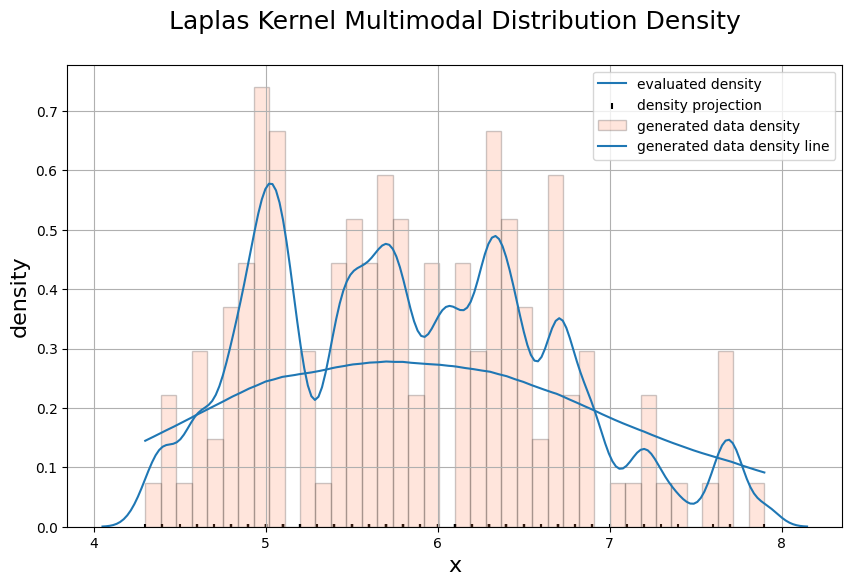

In [ ]:
plot_parzen_density_recovery(selected_feature, parzen_rozenblatt, kernel_laplas,
                             'Laplas Kernel Multimodal Distribution')